# Biomarkers to Predictive Modeling: Leveraging Feature Selection and Ensemble Learning for Ovarian Cancer Prognosis

In [1]:
import pandas as pd

data = pd.read_excel("archive/Supplementary data 1.xlsx")
data.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58\t,19.36,47,45.4,56.0,11.0,24.0,0.01,0.30,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24\t,23.98,61,39.9,95.0,9.0,13.0,0.02,0.30,...,76.5,0.30,11.2,1.09,304,4.89,12.7,6.8,72.0,119.2
2,3,1.50\t,18.40,39,45.4,77.0,9.0,18.0,0.03,0.60,...,69.7,0.13,15.2,0.97,112,4.62,12.0,14.8,77.9,209.2
3,4,2.75,16.60,45,39.2,26.0,16.0,17.0,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35.0,47.0,21.0,27.0,0.01,0.10,...,59.5,0.28,11.9,0.94,272,4.40,13.4,5.3,66.5,206.0


In [2]:
data.shape

(349, 51)

----------------------------------------------------------------------------------------

### Pre-Processing Data

#### Check Null value. If found Null-value manage null value using different technique.

In [3]:
# check null value, 
data.isnull().sum()

SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9         24
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

In [4]:
# This column data type is object and here instance 22 so, 
ObjectColumnName = ['AFP','AG', 'Age','CA125','CA19-9']

def ObjectNullValueRecover(columnName):
    for cn in columnName:
            data[cn] = data[cn].astype(str).str.replace('\t', '', regex=False)
            data[cn] = pd.to_numeric(data[cn],errors='coerce')
            data[cn] = data[cn].fillna(data[cn].mean())

ObjectNullValueRecover(ObjectColumnName)

In [5]:
# Neumecial Column Remove Null Value, 
neumerical_Column = ['AG', 'ALB','ALP','ALT','AST','CEA','CO2CP','DBIL','GGT','GLO','HE4','IBIL','MPV','NEU','TBIL','TP','PCT','PDW']

def nullValueRecover_Neumeric(columnName):
    for cn in columnName:
        data[cn] = data[cn].fillna(data[cn].mean())


nullValueRecover_Neumeric(neumerical_Column)

In [6]:
# Drop Column 

data = data.drop(columns=['CA72-4']) # 240 null values found!


In [7]:
def checkColumnDetails(columnName):
    print(f"Data Type : {data[columnName].dtype}")
    print(f"Null Value : {data[columnName].isnull().sum()}")
    print(f"Data Unique : {data[columnName].unique()}")
    print(f"Value Counts : {data[columnName].value_counts()}")


checkColumnDetails('PDW')

Data Type : float64
Null Value : 0
Data Unique : [13.4        11.2        15.2        17.4        11.9        19.1
 16.8        15.1        16.9         8.8        10.4        20.2
 11.         16.5        11.8        16.1        12.7        13.7
 10.6        17.3        12.1        11.4        15.5        15.4
 18.65       17.9        14.1        11.7        17.2        18.8
 17.         14.3        10.2         9.9        20.47        8.9
 18.2        16.3        20.6        13.1        17.1        16.7
 10.1        18.         13.3        16.08       13.5        14.2
 10.9        11.5        15.7        10.3        14.6        12.3
 17.5        16.4        16.22       22.5        10.7         9.3
 22.8        22.         16.2        16.52       12.8        14.9
 14.7        14.5        19.6        18.67       11.3        10.5
 21.6        19.3        17.6        12.4        20.4        12.6
 18.1        16.06       18.9        17.7        18.4        13.8
 12.2        14.4        16

In [8]:
data.isnull().sum()

SUBJECT_ID    0
AFP           0
AG            0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BASO#         0
BASO%         0
BUN           0
Ca            0
CA125         0
CA19-9        0
CEA           0
CL            0
CO2CP         0
CREA          0
TYPE          0
DBIL          0
EO#           0
EO%           0
GGT           0
GLO           0
GLU.          0
HCT           0
HE4           0
HGB           0
IBIL          0
K             0
LYM#          0
LYM%          0
MCH           0
MCV           0
Menopause     0
Mg            0
MONO#         0
MONO%         0
MPV           0
Na            0
NEU           0
PCT           0
PDW           0
PHOS          0
PLT           0
RBC           0
RDW           0
TBIL          0
TP            0
UA            0
dtype: int64

(349, 50)

#### Check Outliers and Manage

Outliers found in column: AG
Outliers found in column: ALB
Outliers found in column: ALP
Outliers found in column: ALT
Outliers found in column: AST
Outliers found in column: CEA
Outliers found in column: CO2CP
Outliers found in column: DBIL
Outliers found in column: GGT
Outliers found in column: GLO
Outliers found in column: HE4
Outliers found in column: IBIL
Outliers found in column: MPV
Outliers found in column: NEU
Outliers found in column: TBIL
Outliers found in column: TP
Outliers found in column: PCT


/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_28181/4059311238.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)


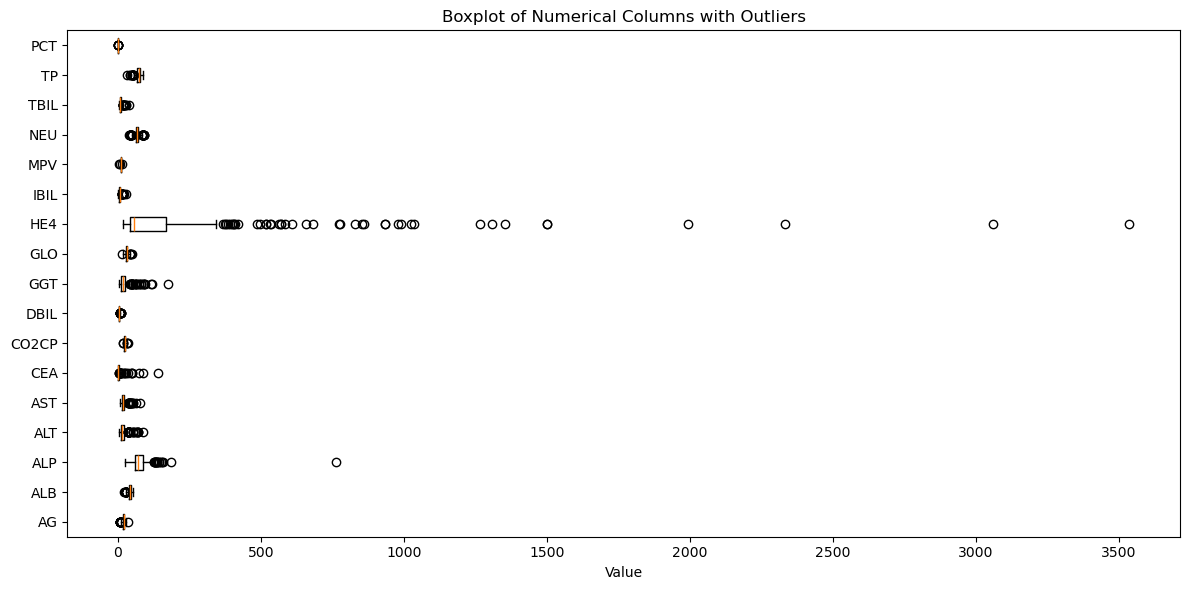

In [9]:
import matplotlib.pyplot as plt

# Check for outliers in all numerical columns and plot boxplots
outlier_columns = []
for col in neumerical_Column:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)][col]
    if not outliers.empty:
        outlier_columns.append(col)
        print(f"Outliers found in column: {col}")

if outlier_columns:
    plt.figure(figsize=(12, 6))
    plt.boxplot([data[col] for col in outlier_columns], labels=outlier_columns, vert=False)
    plt.title("Boxplot of Numerical Columns with Outliers")
    plt.xlabel("Value")
    plt.tight_layout()
    plt.show()
else:
    print("No outlier values found in the specified numerical columns.")

🔎 Outlier Fix Summary:
 - AFP: 14 outliers clipped
 - AG: 18 outliers clipped
 - Age: 0 outliers clipped
 - ALB: 14 outliers clipped
 - ALP: 17 outliers clipped
 - ALT: 26 outliers clipped
 - AST: 18 outliers clipped
 - BASO#: 6 outliers clipped
 - BASO%: 3 outliers clipped
 - BUN: 7 outliers clipped
 - Ca: 22 outliers clipped
 - CA125: 36 outliers clipped
 - CA19-9: 31 outliers clipped
 - CEA: 22 outliers clipped
 - CL: 15 outliers clipped
 - CO2CP: 5 outliers clipped
 - CREA: 7 outliers clipped
 - DBIL: 15 outliers clipped
 - EO#: 18 outliers clipped
 - EO%: 19 outliers clipped
 - GGT: 27 outliers clipped
 - GLO: 6 outliers clipped
 - GLU.: 25 outliers clipped
 - HCT: 11 outliers clipped
 - HE4: 43 outliers clipped
 - HGB: 18 outliers clipped
 - IBIL: 11 outliers clipped
 - K: 5 outliers clipped
 - LYM#: 11 outliers clipped
 - LYM%: 0 outliers clipped
 - MCH: 23 outliers clipped
 - MCV: 18 outliers clipped
 - Menopause: 0 outliers clipped
 - Mg: 9 outliers clipped
 - MONO#: 12 outlie

/var/folders/h1/x8cfj9p51559f3t05mnh0kh40000gn/T/ipykernel_28181/829592848.py:41: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


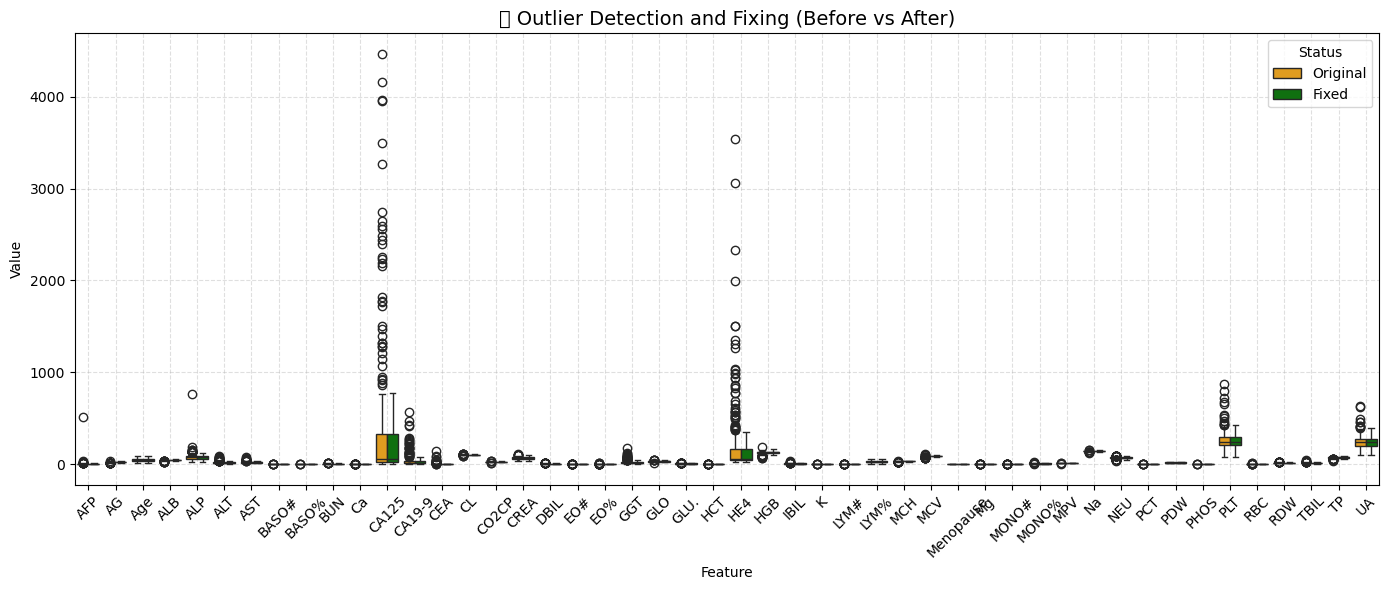

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


numeric_data = data.drop(columns=['SUBJECT_ID', 'TYPE'], errors='ignore').select_dtypes(include='number')

def fix_outliers(df):
    df_fixed = df.copy()
    print("🔎 Outlier Fix Summary:")
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f" - {col}: {outliers} outliers clipped")
        df_fixed[col] = df[col].clip(lower=lower, upper=upper)
    return df_fixed


clean_data = fix_outliers(numeric_data)


original_melted = numeric_data.melt(var_name='Feature', value_name='Value')
original_melted['Status'] = 'Original'

clean_melted = clean_data.melt(var_name='Feature', value_name='Value')
clean_melted['Status'] = 'Fixed'

combined = pd.concat([original_melted, clean_melted])


plt.figure(figsize=(14, 6))
sns.boxplot(data=combined, x='Feature', y='Value', hue='Status', palette=['orange', 'green'])
plt.title('📦 Outlier Detection and Fixing (Before vs After)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


#### Minimum Std

In [11]:
std_value = data.std()
min_std = std_value.min()
min_std

0.020889981607336388

#### Find out the co-relation 

In [ ]:
corelation_matrix = data.corr()
corelation_matrix

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
SUBJECT_ID,1.000000,-0.053726,-0.223562,-0.303549,0.360036,-0.028274,-0.041450,0.043268,-0.115879,-0.119144,...,-0.083568,-0.004874,-0.188852,0.075400,-0.133168,0.072167,-0.177337,0.326093,0.165034,0.097824
AFP,-0.053726,1.000000,0.001376,-0.067084,-0.044923,-0.001158,-0.032422,-0.046518,0.057212,0.019615,...,0.043276,-0.033702,0.042568,-0.070700,0.023939,-0.063648,-0.002340,-0.037671,-0.028534,-0.021459
AG,-0.223562,0.001376,1.000000,-0.102935,0.038828,0.096989,-0.006762,-0.175076,-0.073324,-0.069036,...,0.009155,0.098177,0.006430,0.036321,0.089273,0.133202,-0.077394,-0.075884,0.119752,0.010216
Age,-0.303549,-0.067084,-0.102935,1.000000,-0.266651,0.170280,0.077371,0.303679,-0.040091,-0.116684,...,0.295981,0.161953,-0.109876,-0.047021,0.139641,-0.083455,0.006485,-0.019380,-0.139461,0.127121
ALB,0.360036,-0.044923,0.038828,-0.266651,1.000000,-0.050732,-0.011328,-0.010820,-0.093903,0.001915,...,-0.272719,-0.231197,-0.042275,0.120844,-0.357401,0.333235,-0.152500,0.301526,0.747566,0.048807
ALP,-0.028274,-0.001158,0.096989,0.170280,-0.050732,1.000000,0.047240,0.161830,-0.008726,-0.030086,...,0.136636,0.132581,-0.064841,-0.013317,0.108665,0.142704,0.000626,0.147249,0.024815,0.041906
ALT,-0.041450,-0.032422,-0.006762,0.077371,-0.011328,0.047240,1.000000,0.614124,0.105313,0.067857,...,-0.084291,-0.094783,0.182953,-0.029805,-0.042308,0.091006,0.102443,0.102270,0.078685,0.095093
AST,0.043268,-0.046518,-0.175076,0.303679,-0.010820,0.161830,0.614124,1.000000,-0.074399,-0.138474,...,0.103903,0.158979,-0.123439,0.070838,0.101103,0.106996,0.024579,0.164019,0.042017,0.166936
BASO#,-0.115879,0.057212,-0.073324,-0.040091,-0.093903,-0.008726,0.105313,-0.074399,1.000000,0.853284,...,-0.159931,-0.039397,0.337207,-0.033329,0.135617,0.160975,0.278580,-0.036532,-0.083696,0.021282
BASO%,-0.119144,0.019615,-0.069036,-0.116684,0.001915,-0.030086,0.067857,-0.138474,0.853284,1.000000,...,-0.385200,-0.221634,0.384694,0.011404,-0.051076,0.078685,0.277433,-0.046242,-0.012624,-0.039726


----------------------------------------------------------------------------------------

#### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['SUBJECT_ID','TYPE'])
y = data['TYPE']


x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)

print("Traing x Data Shape: ", x_train.shape)
print("Training y Data Shape : ", y_train.shape)
print("Testing x Data Shape: ", x_test.shape)
print("Testing y Data Shape: ", y_test.shape)


Traing x Data Shape:  (279, 48)
Training y Data Shape :  (279,)
Testing x Data Shape:  (70, 48)
Testing y Data Shape:  (70,)


----------------------------------------------------------------------------------------

### Model

In [87]:
from sklearn.feature_selection import RFE
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve

def Model_Build(estimator, modelName, x_train, y_train, x_test, y_test):
    
    # Feature Selection
    feature_selection = RFE(
        estimator=estimator, 
        n_features_to_select=16, 
        step=1, 
        verbose=0, 
        importance_getter='auto'
    )
    
    # Fit RFE to training data
    feature_selection.fit(x_train, y_train)
    

    # Get the selected features
    selected_features = x_train.columns[feature_selection.support_]
    print("Selected features:", selected_features.tolist())

    # selected features
    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]

    # Fit model on selected features
    estimator.fit(x_train_selected, y_train)

    # Predict on test data
    y_pred = estimator.predict(x_test_selected)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # use 'macro' or 'weighted' if multiclass
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    confusionMatrix = confusion_matrix(y_test, y_pred)

    # Print metrics
    print(f"Model Name : {modelName}")
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1-Score : {f1:.4f}")

    # Confusion Matrix Heatmap
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusionMatrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'{modelName} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()


    # ROC-AUC Score
    y_probs = estimator.predict_proba(x_test_selected)[:, 1]
    auc = roc_auc_score(y_test, y_probs)
    print(f"AUC-ROC  : {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}", color='blue')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{modelName} - ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



#### Adaboost

Selected features: ['AFP', 'Age', 'ALB', 'AST', 'CA125', 'CEA', 'CO2CP', 'CREA', 'DBIL', 'GLU.', 'HE4', 'LYM#', 'NEU', 'PHOS', 'RDW', 'TP']
Model Name : AdaBooster
Accuracy : 0.9000
Precision: 0.8974
Recall   : 0.9211
F1-Score : 0.9091


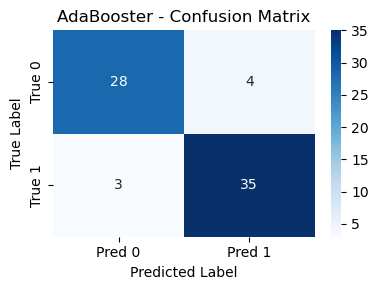

AUC-ROC  : 0.9079


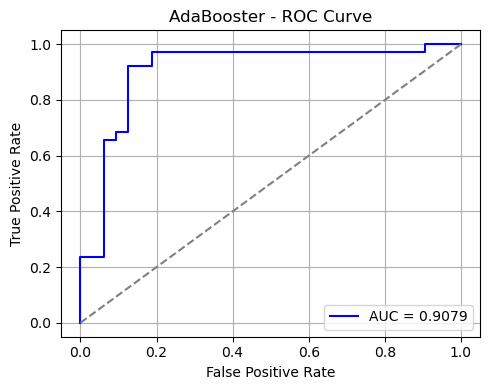

In [88]:
from sklearn.ensemble import AdaBoostClassifier

model_Adabooster = AdaBoostClassifier(n_estimators=50, 
                                      random_state=42)

Model_Build(model_Adabooster,"AdaBooster",x_train,y_train,x_test,y_test)

#### Catboost

Selected features: ['AFP', 'Age', 'ALB', 'BASO%', 'CA125', 'CEA', 'CO2CP', 'GLO', 'HE4', 'IBIL', 'LYM%', 'MCH', 'MPV', 'NEU', 'PHOS', 'UA']
Model Name : CatBoost Classifier
Accuracy : 0.8714
Precision: 0.8718
Recall   : 0.8947
F1-Score : 0.8831


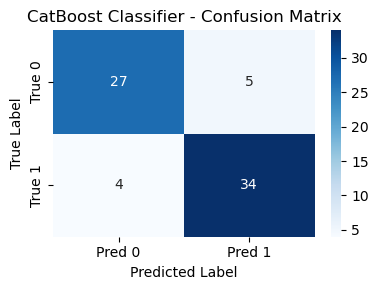

AUC-ROC  : 0.9252


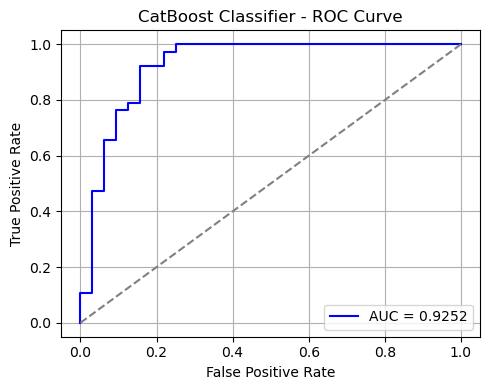

In [89]:
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier(iterations=100,
                                    learning_rate=0.1,
                                    depth=6,
                                    verbose=0,  
                                    random_state=42
)

Model_Build(catboost_model, "CatBoost Classifier", x_train, y_train, x_test, y_test)

#### Random Forest

Selected features: ['AFP', 'Age', 'ALB', 'ALP', 'CA125', 'CEA', 'CO2CP', 'GLO', 'HE4', 'IBIL', 'LYM#', 'LYM%', 'MCH', 'MPV', 'NEU', 'PLT']
Model Name : Random Forest Classifier
Accuracy : 0.8714
Precision: 0.8718
Recall   : 0.8947
F1-Score : 0.8831


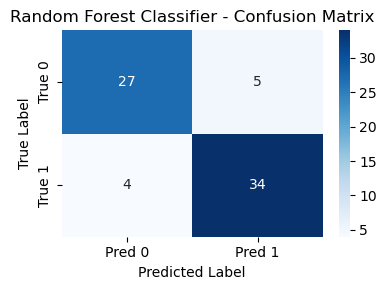

AUC-ROC  : 0.9141


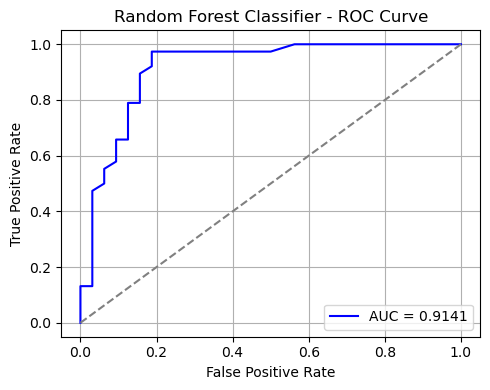

In [90]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100,
                                  max_depth=None,
                                  random_state=42,
)

Model_Build(rf_model, "Random Forest Classifier", x_train, y_train, x_test, y_test)

#### Gradient boosting

Selected features: ['AFP', 'Age', 'ALB', 'CA125', 'CEA', 'CO2CP', 'GLO', 'HE4', 'HGB', 'LYM%', 'MPV', 'NEU', 'PCT', 'PHOS', 'TP', 'UA']
Model Name : Gradient Boosting Classifier
Accuracy : 0.8714
Precision: 0.8919
Recall   : 0.8684
F1-Score : 0.8800


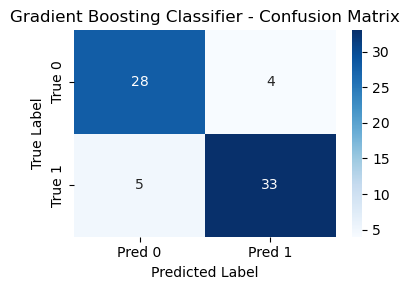

AUC-ROC  : 0.9149


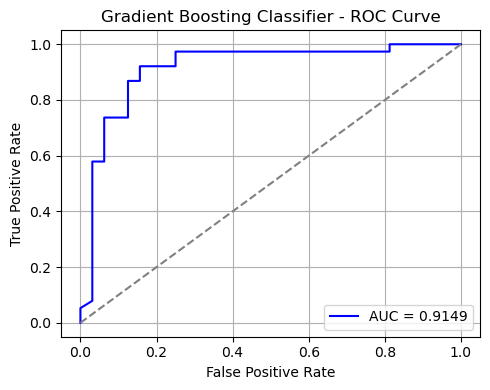

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100,
                                      learning_rate=0.1,
                                      max_depth=3,
                                      random_state=42
)

Model_Build(gb_model, "Gradient Boosting Classifier", x_train, y_train, x_test, y_test)


| AUC Score   | Model Quality     |
| ----------- | ----------------- |
| 0.90 - 1.0  | Excellent         |
| 0.80 - 0.90 | Very Good         |
| 0.70 - 0.80 | Good              |
| 0.60 - 0.70 | Poor              |
| 0.50 - 0.60 | Fail (No skill)   |
| < 0.5       | Worse than random |
